In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #seabornない人はpip installしてね
import os
from datetime import datetime

# カレントディレクトリを.pyと合わせるために以下を実行
from pathlib import Path
if Path.cwd().name == "notebook":
    os.chdir("..")


# 設定
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
# Mac Matplotlibのデフォルトフォントをヒラギノ角ゴシックに設定
plt.rcParams['font.family'] = 'Hiragino Sans'

In [9]:
# Windows MatplotlibのデフォルトフォントをMeiryoに設定
plt.rcParams['font.family'] = 'Meiryo'

In [7]:
# CSVファイルを読み込む
file_path = 'data/input/user_info_cleansing.csv'  # ファイルパスを適切に設定してください
data = pd.read_csv(file_path)

In [8]:
data.describe()

,Unnamed: 0,id,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,zipcode
count,72710.000000,72710.000000,72710.0,72710.000000,72710.000000,72710.000000,72710.000000,72710.000000,7.077800e+04
mean,50695.257943,51184.100619,inf,17.458898,154.322636,98.748345,2.848028,0.384308,7.577228e+06
std,28410.945646,30353.653270,NaN,63.892501,250.898000,165.705086,15.255239,0.777139,3.116387e+06
min,3.000000,62.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000006e+06
25%,26291.500000,23942.500000,86.0,0.000000,36.000000,23.000000,0.000000,0.000000,3.230805e+06
50%,51049.000000,51154.500000,558.0,0.000000,95.000000,70.000000,0.000000,0.000000,9.650015e+06
75%,75154.500000,77523.750000,1615.0,0.000000,196.000000,135.000000,0.000000,1.000000,9.830005e+06
max,99819.000000,105519.000000,inf,3614.000000,16880.000000,15460.000000,149.699997,5.000000,9.999999e+06


In [9]:
data[data['club_coin'] == data['club_coin'].max()]

,Unnamed: 0,id,nickname,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,gender,birth_day,zipcode
18429,26649,30198,Mダックス,inf,0.0,13890.0,12640.0,0.0,0,男,1961-08-13,9893123.0


In [10]:
sorted_df = data.sort_values(by='club_coin', ascending=False)
sorted_df.head()

,Unnamed: 0,id,nickname,club_coin,recycle_point,total_recycle_amount,recycle_amount_per_year,recycle_amount_after_gold_member,rank_continuation_class,gender,birth_day,zipcode
18429,26649,30198,Mダックス,inf,0.0,13890.0,12640.0,0.0,0,男,1961-08-13,9893123.0
40439,56590,59008,サトウ,59900.0,0.0,15910.0,15460.0,0.0,0,男,1970-01-03 00:00:00,9650025.0
13567,19502,233,ずらまる,51900.0,952.0,8090.0,2390.0,0.0,0,女,1977-08-05 00:00:00,9891321.0
6973,10548,1467,くまちゃん,39740.0,115.0,7244.0,2266.0,0.0,0,女,1962-12-08 00:00:00,NaN
6772,10300,1444,ミィ,37470.0,135.0,5424.0,1509.0,0.0,0,女,1980-08-28 00:00:00,NaN


In [11]:
# birth_dayをdatetimeに変換し、年代を計算
data['birth_day'] = pd.to_datetime(data['birth_day'], errors='coerce')
current_year = pd.Timestamp.now().year
data['age'] = current_year - data['birth_day'].dt.year
# 年齢と性別が欠損している行を削除
data_age_gender = data.dropna(subset=['age', 'gender']).copy()
# 年齢を年代に変換
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

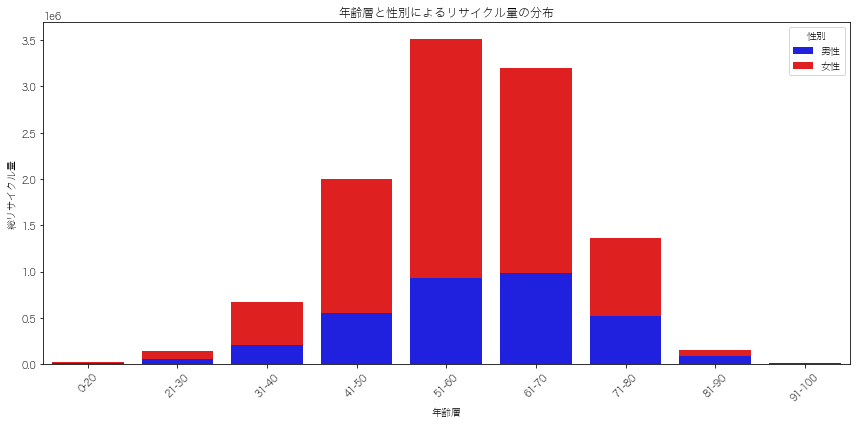

In [12]:
# 年齢層と性別に基づいてリサイクル量を集計
grouped_data = data.groupby(['age_group', 'gender'], observed=True)['total_recycle_amount'].sum().unstack()

# 棒グラフを描画
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_data.index,
            y=grouped_data['男'], color='blue', label='男性')
sns.barplot(x=grouped_data.index,
            y=grouped_data['女'], color='red', label='女性', bottom=grouped_data['男'])
# sns.barplot(x=grouped_data.index,
#             y=grouped_data['無回答'], color='gray', label='無回答', bottom=grouped_data['無回答'])
plt.xlabel('年齢層')
plt.ylabel('総リサイクル量')
plt.title('年齢層と性別によるリサイクル量の分布')
plt.legend(title='性別')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<BarContainer object of 9 artists>

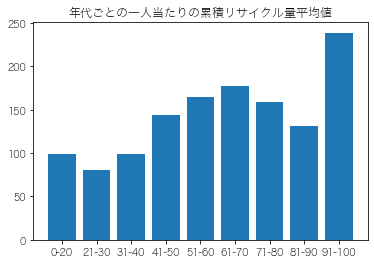

In [13]:
# 年代ごとの一人当たりの累積リサイクル量平均値
average_recycle_by_decade = data.groupby('age_group', observed=True)['total_recycle_amount'].mean()
# print(average_recycle_by_decade)

# 棒グラフで表示
plt.title('年代ごとの一人当たりの累積リサイクル量平均値')
plt.bar(average_recycle_by_decade.index, average_recycle_by_decade)

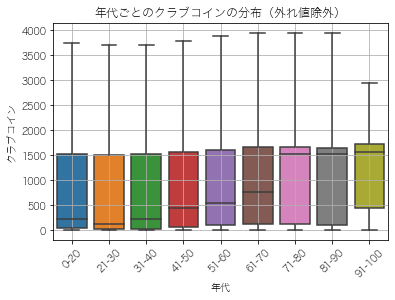

In [14]:
# 箱ひげ図を描画（外れ値を除外）
fig, ax = plt.subplots()

sns.boxplot(x='age_group', y='club_coin', data=data, showfliers=False)
plt.title('年代ごとのクラブコインの分布（外れ値除外）')
plt.xlabel('年代')
plt.ylabel('クラブコイン')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


・クラブコインは使用したらなくなるため、この値は信ぴょう性が低い？→クラブコインの累積データはないのか？(machi)  
・【確認】'toral recycle amount'で見るべき(machi)  
・年齢層が高いほど、中央値が高い（minとmaxで7倍違う(machi)  
・若年層はそもそもボリュームが少ない？→年齢の人数ヒストグラムを見たい(machi)  
・子育て世代（今回のターゲット？）のクラブコイン(machi)  
・クラブコインを消費していないということは、アプリを開いてコインを使用していない。つまり、アプリ使いこなせていない可能性。(machi)  
　→point_historyやgacha_historyで確認できる可能性大(machi)  
・minは0(machi)  
・'club coin'、'recycle point'はポイント消費によって逐次変化する値のため、user_info.csvで分析する必要はない(machi)  
・【確認】'recycle_amount_per_year'は本当に、年平均リサイクル量なのか、1年に一回バッチでリセットしているのか(後者の可能性大？))(machi)  
・【確認】年代-クラブコインの分布に相関あり(machi)  

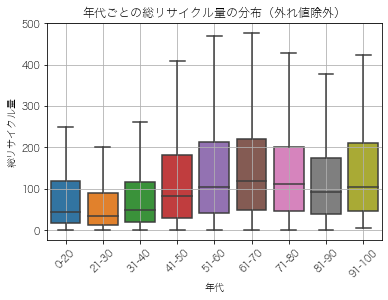

In [15]:
# 箱ひげ図を描画（外れ値を除外）
fig, ax = plt.subplots()
sns.boxplot(x='age_group', y='total_recycle_amount', data=data, showfliers=False)
plt.title('年代ごとの総リサイクル量の分布（外れ値除外）')
plt.xlabel('年代')
plt.ylabel('総リサイクル量')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

・【確認】人数のボリュームがそのままリサイクル量に影響している可能性があるため、各年代の人数ヒストグラムを確認したい。

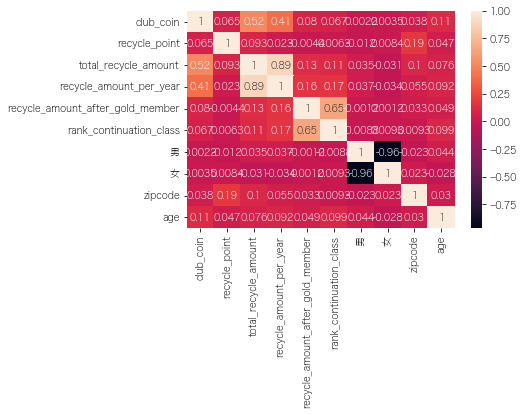

In [16]:
# genderを区分値に変更
# ワンホットエンコーディング
data['男'] = data['gender'].apply(lambda x: 1 if x == '男' else 0)
data['女'] = data['gender'].apply(lambda x: 1 if x == '女' else 0)

# 'a'、'b'、'c' カラムのみを選択して相関係数を算出
selected_columns = ['club_coin', 'recycle_point', 'total_recycle_amount', 'recycle_amount_per_year', 'recycle_amount_after_gold_member', 'rank_continuation_class',  '男',  '女', 'birth_day', 'zipcode', 'age']
correlation_matrix = data[selected_columns].corr()

# ヒートマップ
sns.heatmap(correlation_matrix, annot=True)
plt.show()



・ageとリサイクル量に相関が全くないのは、他グラフと矛盾するのでは？(machi)
　→散布図でデータそのものの散らばりぐらいを見てみる(machi)
・他csvと合体して相関を見ないと、特に意味のない結果に。(machi)  
・genderが白なのは、相関係数→ワンホットエンコーディングしてみました。解消はしてますが、これでいいのか。。。(machi)  
・zipcodeから緯度経度を出して位置関係からクラスタリングして分析してみたい(machi)  

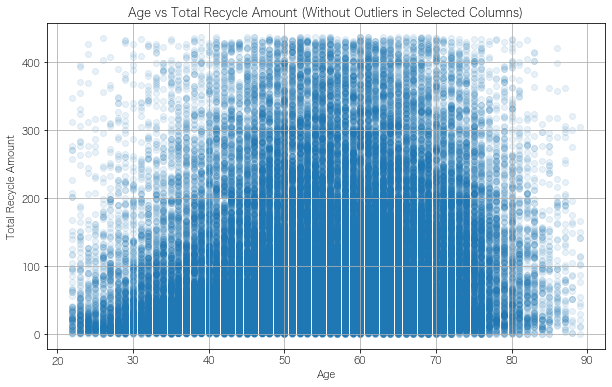

,age,total_recycle_amount
age,1.000000,0.142057
total_recycle_amount,0.142057,1.000000


In [17]:
# これらのカラムのための四分位数を計算
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_recycle = data['total_recycle_amount'].quantile(0.25)
Q3_recycle = data['total_recycle_amount'].quantile(0.75)
IQR_recycle = Q3_recycle - Q1_recycle

# 外れ値の定義
outliers_age = (data['age'] < (Q1_age - 1.5 * IQR_age)) | (data['age'] > (Q3_age + 1.5 * IQR_age))
outliers_recycle = (data['total_recycle_amount'] < (Q1_recycle - 1.5 * IQR_recycle)) | (data['total_recycle_amount'] > (Q3_recycle + 1.5 * IQR_recycle))

# 外れ値を除外
data_no_outliers = data[~(outliers_age | outliers_recycle)]

# 外れ値を除外したデータでの散布図を描画
plt.figure(figsize=(10, 6))
plt.scatter(data_no_outliers['age'], data_no_outliers['total_recycle_amount'], alpha = 0.1)
plt.title('Age vs Total Recycle Amount (Without Outliers in Selected Columns)')
plt.xlabel('Age')
plt.ylabel('Total Recycle Amount')
plt.grid(True)
plt.show()

# 相関係数の計算
correlation = data_no_outliers[['age', 'total_recycle_amount']].corr()

correlation

In [ ]:
・年代とtotal recycle amountに相関があると期待していたので、散布図を眺めてみたが、やはり相関無し(machi)  
・正規分布っぽい？(machi)

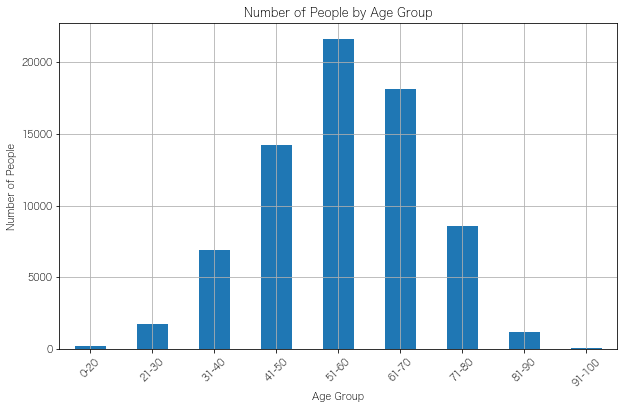

In [18]:
# 年代別の人数をヒストグラムで表示
plt.figure(figsize=(10, 6))
data['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of People by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

・年代別の人数分布が描画されていなかったので、ここでしときました(machi)